In [28]:
!pip install calplot pandas



In [29]:
import pandas as pd

#Plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import calendar
import calplot # actually used

# Score model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor



In [30]:
url = "https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv"
df = pd.read_csv(url,header=1)


In [31]:
df.head(5)

# df.size 545104 rows
# from Jan 8
# June 30

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1


In [32]:
# Use the nunique() function to count the number of unique values in the column
unique_count = df['bus_id'].nunique()

# Print the result
print(f"Number of different numbers in the column: {unique_count}")

Number of different numbers in the column: 152


In [33]:
max_delay_row = df[df['arrival_delay'] == df['arrival_delay'].max()]
print(max_delay_row)

        Calendar_date  route_id  bus_id  stop_sequence  arrival_delay  \
490068       20220609         4   44063             19           2257   

        dwell_time  travel_time_for_previous_section  scheduled_travel_time  \
490068          26                                41                     57   

        upstream_stop_delay  origin_delay  ...  factor(weather)Rain  \
490068                 2231          1285  ...                    0   

        factor(weather)Snow  factor(temperature)Cold  \
490068                    0                        0   

        factor(temperature)Extra_cold factor(temperature)Normal  \
490068                              0                         1   

       factor(day_of_week)weekday factor(day_of_week)weekend  \
490068                          1                          0   

       factor(time_of_day)Afternoon_peak  factor(time_of_day)Morning_peak  \
490068                                 0                                0   

        factor(time

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 0 to 545102
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Calendar_date                      545103 non-null  int64  
 1   route_id                           545103 non-null  int64  
 2   bus_id                             545103 non-null  int64  
 3   stop_sequence                      545103 non-null  int64  
 4   arrival_delay                      545103 non-null  int64  
 5   dwell_time                         545103 non-null  int64  
 6   travel_time_for_previous_section   545103 non-null  int64  
 7   scheduled_travel_time              545103 non-null  int64  
 8   upstream_stop_delay                545103 non-null  int64  
 9   origin_delay                       545103 non-null  int64  
 10  previous_bus_delay                 545103 non-null  int64  
 11  previous_trip_travel_time          5451

<ipython-input-35-667ff7e28ae9>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_filtered, x='time_of_day', y='arrival_delay', hue='day_of_week', order=['OP', 'MP', 'AP'], hue_order=['weekday', 'weekend'], dodge=0.532, join=False, palette="dark", markers="D", scale=0.75, ci=None)


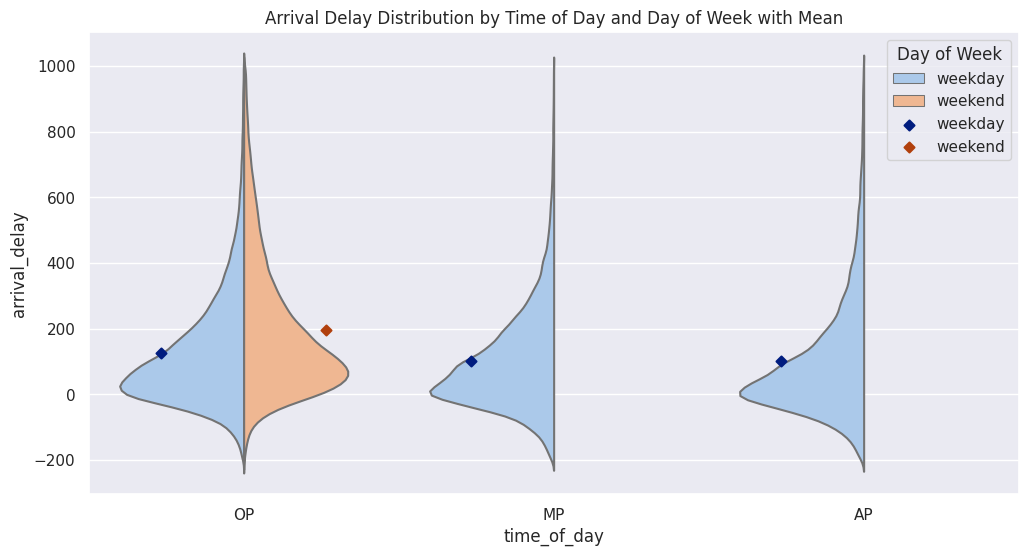

In [35]:
# Filter the data
df_filtered = df[df['arrival_delay'].between(-200, 1000)]

plt.figure(figsize=(12, 6))

# Violin plot
sns.violinplot(data=df_filtered, x='time_of_day', y='arrival_delay', hue='day_of_week', order=['OP', 'MP', 'AP'], hue_order=['weekday', 'weekend'], split=True, inner=None, palette="pastel")

# Point plot to indicate means
sns.pointplot(data=df_filtered, x='time_of_day', y='arrival_delay', hue='day_of_week', order=['OP', 'MP', 'AP'], hue_order=['weekday', 'weekend'], dodge=0.532, join=False, palette="dark", markers="D", scale=0.75, ci=None)

plt.title('Arrival Delay Distribution by Time of Day and Day of Week with Mean')
plt.legend(title='Day of Week')
plt.show()


In [36]:
print(df["weather"].unique())
print(df["temperature"].unique())

df = df.drop(columns='temperature')  # Remove it since we have them already
df = df.drop(columns='weather')  # Remove it since we have them already


['Light Snow' 'Normal' 'Light Rain' 'Rain' 'Snow']
['Normal' 'Cold' 'Extra cold']


In [37]:
print("routeid",df["route_id"].unique())
print("bus id",df["bus_id"].unique())

print("time of day",df["time_of_day"].unique())
print("day of week",df["day_of_week"].unique())

df = df.drop(columns='time_of_day')  # Remove it since we have them already
df = df.drop(columns='day_of_week')  # Remove it since we have them already



routeid [4]
bus id [41344 41732 44417 45537 41370 41358 41369 41353 44416 41360 44066 41362
 44068 41359 44418 45536 44060 41352 41363 44069 45535 44057 41379 44058
 41728 44410 44413 45544 45538 41345 41361 41924 41365 41376 41372 45540
 41366 41351 45532 41356 41725 44062 41346 45529 44063 45703 44086 41378
 44065 45541 44064 45531 41374 41729 41348 45543 44067 41364 41355 41357
 44415 44059 45545 41733 41367 41354 41349 45542 44061 41343 45534 44411
 44412 41731 44056 41371 41730 41724 44074 45530 45533 41734 45539 44414
 41727 41373 44092 44091 44082 44079 44073 45189 44090 41395 44083 41398
 44070 41881 41892 41350 41726 41375 41377 41877 44571 44093 45709 45716
 41930 41394 44071 44055 45792 41886 41911 41397 41864 44054 41347 41859
 41396 41368 44081 44076 41875 44077 45778 41720 41915 41918 45807 41908
 45707 41929 45780 44088 44582 41865 41879 41383 45702 45808 41912 41923
 45211 45723 41721 44419 41860 44573 45722 45711]
time of day ['OP' 'MP' 'AP']
day of week ['weekend' 'we

In [38]:
column_titles_list = df.columns.tolist()
print(column_titles_list)

['Calendar_date', 'route_id', 'bus_id', 'stop_sequence', 'arrival_delay', 'dwell_time', 'travel_time_for_previous_section', 'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay', 'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition', 'recurrent_delay', 'factor(weather)Light_Rain', 'factor(weather)Light_Snow', 'factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Snow', 'factor(temperature)Cold', 'factor(temperature)Extra_cold', 'factor(temperature)Normal', 'factor(day_of_week)weekday', 'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak', 'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak']


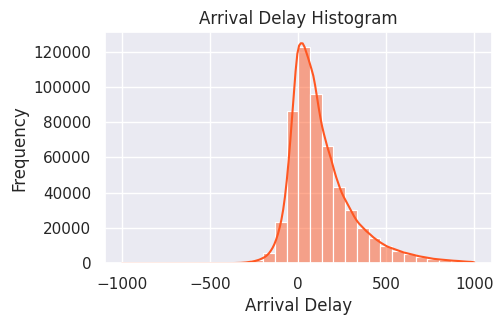

In [39]:
# Set a theme for seaborn
sns.set_theme()
filtered_df = df[(df['arrival_delay'] >= -1000) & (df['arrival_delay'] <= 1000)]
# Plot the enhanced histogram
plt.figure(figsize=(5,3))
sns.histplot(filtered_df['arrival_delay'], bins=30, kde=True, color="#ff5722")
plt.title('Arrival Delay Histogram')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.show()


In [40]:
snow_days_count = df['factor(weather)Snow'].sum()

print(f"Number of snow days: {snow_days_count}")

Number of snow days: 3699


In [41]:
df.head()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2022'>], dtype=object))

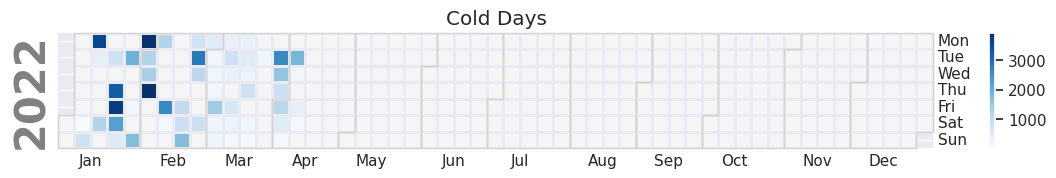

In [42]:
# Convert 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot using calplot
calplot.calplot(df['factor(temperature)Cold'], cmap='Blues', edgecolor='lightgray', suptitle="Cold Days", linewidth=1)


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2022'>], dtype=object))

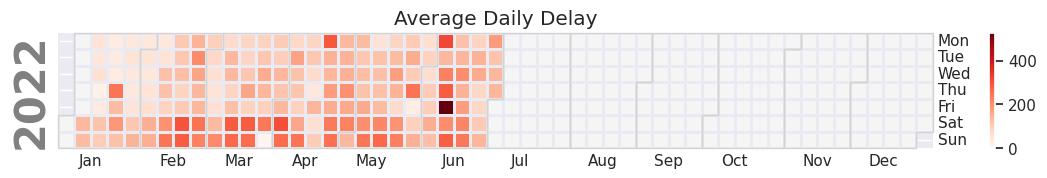

In [43]:
# Group by 'Date' and take the mean of the 'arrival_delay'
avg_delay_per_day = df.groupby('Date')['arrival_delay'].mean()

# Plot the average delay in the calendar
calplot.calplot(avg_delay_per_day, cmap='Reds', edgecolor='lightgray', suptitle="Average Daily Delay", linewidth=1)

# Create a base line model (Mean)

In [ ]:

# Assuming df is your DataFrame
# 1. Calculate the mean of the actual delays
mean_delay = df['arrival_delay'].mean()

# 2. Create a new column with the mean delay as prediction
df['predicted_delay'] = mean_delay

# 3. Calculate MSE
mse = mean_squared_error(df['arrival_delay'], df['predicted_delay'])
print(f"Mean Squared Error (MSE): {mse}")

# Calculate other metrics if required:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(df['arrival_delay'], df['predicted_delay'])
print(f"Mean Absolute Error (MAE): {mae}")

# R^2 Score (not very meaningful in this context, but can be used)
r2 = r2_score(df['arrival_delay'], df['predicted_delay'])
print(f"R^2 Score: {r2}")

# COMMENT FOR REPORT
# Since r^2 = 1- ssres / sstot
# ssres is actual - pred -> since predis mean denominator and numerator is the same
# sstot is actual - mean


Mean Squared Error (MSE): 37596.94219419411
Mean Absolute Error (MAE): 138.98420152332488
R^2 Score: 0.0


# Feature engineering

In [ ]:
df['mean_bus_delay'] = df.groupby('bus_id')['arrival_delay'].transform('mean')

# Regression

In [ ]:
# Split the data into training and test sets (30% held out for testing)
X = df.drop('arrival_delay', axis=1)
y = df['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define Ridge regression model
ridge = Ridge(alpha=1.0)  # Change alpha as needed

model = LinearRegression()

# Recursive feature elimination with cross-validation
selector = RFECV(estimator=ridge, step=1, cv=5)
selector = selector.fit(X_train, y_train)


# Select the important features based on RFECV
X_train_selected = selector.transform(X_train)

print("Number of best features: ", selector.n_features_)
print("Best features: ", X_train.columns[selector.support_])


Number of best features:  26
Best features:  Index(['Calendar_date', 'bus_id', 'stop_sequence', 'dwell_time',
       'travel_time_for_previous_section', 'scheduled_travel_time',
       'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
       'previous_trip_travel_time', 'traffic_condition', 'recurrent_delay',
       'factor(weather)Light_Rain', 'factor(weather)Light_Snow',
       'factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Snow',
       'factor(temperature)Cold', 'factor(temperature)Extra_cold',
       'factor(temperature)Normal', 'factor(day_of_week)weekday',
       'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak',
       'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak',
       'mean_bus_delay'],
      dtype='object')


In [ ]:

ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Calculate adjusted R^2
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 ): {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')


Mean Squared Error (MSE): 395.77755365693133
R-squared (R2 ): 0.9894968789153651
Adjusted R-squared: 0.9894950802377319


# DecisionTreeRegresson

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Mean Squared Error: 825.325626333845
R^2 Score: 0.9780975578136234


# Split weekend & weekday

In [ ]:
# Splitting the DataFrame into weekend and weekday DataFrames

# For weekend
df_weekend = df[df['factor(day_of_week)weekend'] == 1].copy()
df_weekend.drop(columns=['factor(day_of_week)weekend', 'factor(day_of_week)weekday'], inplace=True)

# For weekday
df_weekday = df[df['factor(day_of_week)weekday'] == 1].copy()
df_weekday.drop(columns=['factor(day_of_week)weekend', 'factor(day_of_week)weekday'], inplace=True)


In [ ]:
print(df_weekend.columns)

Index(['Calendar_date', 'route_id', 'bus_id', 'stop_sequence', 'arrival_delay',
       'dwell_time', 'travel_time_for_previous_section',
       'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
       'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition',
       'recurrent_delay', 'factor(weather)Light_Rain',
       'factor(weather)Light_Snow', 'factor(weather)Normal',
       'factor(weather)Rain', 'factor(weather)Snow', 'factor(temperature)Cold',
       'factor(temperature)Extra_cold', 'factor(temperature)Normal',
       'factor(time_of_day)Afternoon_peak', 'factor(time_of_day)Morning_peak',
       'factor(time_of_day)Off-peak', 'predicted_delay', 'mean_bus_delay'],
      dtype='object')


In [ ]:
X = df_weekday.drop('arrival_delay', axis=1)
y = df_weekday['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [27]:
models = [
    ("Decision Tree", DecisionTreeRegressor(), {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}),
    ("Random Forest", RandomForestRegressor(), {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7]}),
    ("Gradient Boosting", GradientBoostingRegressor(), {'n_estimators': [100, 300, 500], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}),
    ("Linear Regression", LinearRegression(), {}),
    ("XGBoost", XGBRegressor(), {'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7]})
]

for model_name, model, params in models:
    print(f"Evaluating {model_name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=params,
                               scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

    # Display results
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R^2 Score: {r2}")
    print(f"{model_name} Cross-validated MSE: {-cv_scores.mean()}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print("-------------------------------------------------------")


Evaluating Decision Tree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Decision Tree MSE: 810.8825089406672
Decision Tree R^2 Score: 0.9750007216854929
Decision Tree Cross-validated MSE: 1903.6357280126056
Best Parameters for Decision Tree: {'max_depth': 9, 'min_samples_split': 10}
-------------------------------------------------------
Evaluating Random Forest...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


KeyboardInterrupt: ignored